In [ ]:
!pip install arabic_reshaper

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
d_train = pd.read_csv('/content/train.csv')
d_test = pd.read_csv('/content/test.csv')

#data exploration

In [ ]:
d_test['Y']='test'

In [ ]:
df = pd.concat([d_train, d_test])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7366 entries, 0 to 817
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Student ID                      7366 non-null   object 
 1   Age                             7260 non-null   float64
 2   Gender                          7366 non-null   object 
 3   Home Region                     7363 non-null   object 
 4   Home City                       7363 non-null   object 
 5   Program ID                      7366 non-null   object 
 6   Program Main Category Code      7366 non-null   object 
 7   Program Sub Category Code       6316 non-null   object 
 8   Technology Type                 4020 non-null   object 
 9   Program Skill Level             5520 non-null   object 
 10  Program Presentation Method     7366 non-null   object 
 11  Program Start Date              7366 non-null   object 
 12  Program End Date                7366 non

In [ ]:
df['Program End Date']= pd.to_datetime(df['Program End Date'])
df['Program Start Date']= pd.to_datetime(df['Program Start Date'])

In [ ]:
#check mssing value
df.isnull().sum()

,0
Student ID,0
Age,106
Gender,0
Home Region,3
Home City,3
Program ID,0
Program Main Category Code,0
Program Sub Category Code,1050
Technology Type,3346
Program Skill Level,1846


In [ ]:
df.duplicated().sum()

np.int64(52)

#Data cleaning

In [ ]:
df = df.drop_duplicates()

In [ ]:
df['Unified_Score_Percentage'] = (
    (df['University Degree Score'] / df['University Degree Score System']) * 100).round(2)

In [ ]:
d_train['College'].isna().sum()

np.int64(3890)

In [ ]:
import re

def clean_light(text):
    text = str(text)
    text = text.strip()
    text = re.sub("[^ء-يA-Za-z0-9 ]+", "", text)  # remove most symbols
    text = re.sub("\s+", " ", text)  # normalize spaces
    text = re.sub(r'\bال', '', text)
    return text.lower()



def cleantext(text):
    text = str(text).split()
    text1 = ""
    for txt in text:
        txt = clean_light(txt)
        text1 = text1 + txt + ' '
    return text1.strip()

df.loc[df['College'].isna(), 'Education Speaciality'] = df.loc[df['College'].isna(), 'Education Speaciality'].apply(lambda x: cleantext(x))


def infer_college(speciality):
  if pd.isna(speciality):
      return None
  s = speciality.lower()
  if any(word in s for word in ['نظم معلومات','علم بيانات','information system','data science','network','information systems','اصطناعي','مواقع','برمجيات','سيبراني','computer','دعم فني','سيبراني', 'نظم معلومات','it','شبكات', 'برمجه','تقنيه','technology','software','امن معلومات' ,'cis', 'حاسب','حاسوبيه']):
      return 'تكنولوجيا الاتصالات والمعلومات'
  elif any(word in s for word in ['اداره', 'اقتصاد','اعمال', 'business', 'mis','management information system']):
      return 'إدارة الأعمال'
  elif any(word in s for word in ['هندسه','enginering']):
      return 'الهندسة'
  elif any(word in s for word in ['ترجمه', 'انجليزيه','لغه', 'لسانيات','تاريخ']):
      return 'الآداب والترجمة'
  elif any(word in s for word in ['قانون', 'شريعه', 'حقوق','وقضايا']):
      return 'القانون أو الشريعة'
  elif any(word in s for word in ['تربيه', 'تعليم']):
      return 'التربية'
  elif any(word in s for word in ['فيزياء','physics','جيولوجيا', 'كيمياء', 'احياء', 'رياضيات', 'علوم', 'bio', 'chemistry', 'biology', 'math']):
      return 'كلية العلوم'
  elif any(word in s for word in ['طب','صيدلي','تمريض', 'امراض','جراحه', 'طبيه',  'طب بشري', 'طب عام',"اشعه" ,'medicin', 'surgery']):
      return 'الطب'
  else:
      return 'كلية أخرى'


df['College_Filled'] = df['College']
df.loc[df['College'].isna(), 'College_Filled'] = df.loc[df['College'].isna(), 'Education Speaciality'].apply(infer_college)


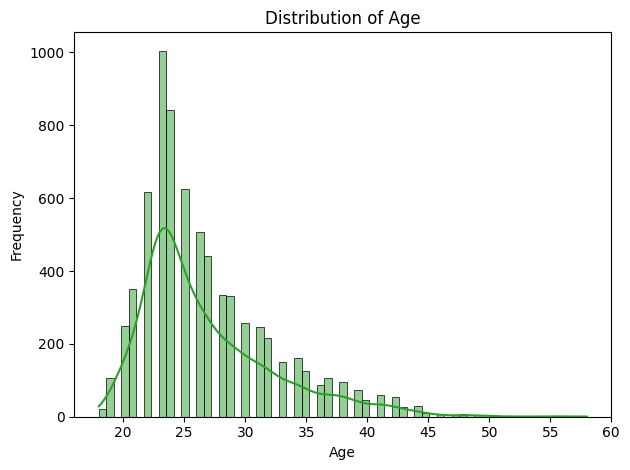

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

green_color = '#2ca02c'
sns.histplot(df['Age'], kde=True, color=green_color)

plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [ ]:
df['Program Sub Category Code'] = df['Program Sub Category Code'].fillna(df['Program Main Category Code'])


In [ ]:
df['Program Skill Level'] = df['Program Skill Level'].fillna('غير معروف')


In [ ]:
df['Level of Education']= df['Level of Education'].fillna('غير معروف')

In [ ]:
df['Employment Status'] = df['Employment Status'].fillna('غير معروف')

In [ ]:
Percentage_mean = df['University Degree Score System'].mean()
df['Unified_Score_Percentage'] = df['Unified_Score_Percentage'].fillna(Percentage_mean)


In [ ]:
df['Home City']=df['Home City'].fillna(df['Home City'].mode()[0])
df['Home Region']=df['Home Region'].fillna(df['Home Region'].mode()[0])

In [ ]:
df.isnull().sum()

,0
Student ID,0
Age,0
Gender,0
Home Region,0
Home City,0
Program ID,0
Program Main Category Code,0
Program Sub Category Code,0
Technology Type,3321
Program Skill Level,0


In [ ]:
df = df.drop(['Still Working', 'Job Type', 'Technology Type' ,'College','Education Speaciality', 'University Degree Score','University Degree Score System'], axis=1)

In [ ]:
df.isna().sum()

,0
Student ID,0
Age,0
Gender,0
Home Region,0
Home City,0
Program ID,0
Program Main Category Code,0
Program Sub Category Code,0
Program Skill Level,0
Program Presentation Method,0


In [ ]:
registration = pd.read_csv('/content/registration.csv')

In [ ]:
df_train = df[~(df['Y'] == 'test')]

df_test = df[df['Y'] == 'test']
df_test = df_test.drop(['Y'], axis=1)
df_test_edited = df_test
df_test_edited = df_test_edited.merge(registration[['Student ID', 'Total Regestration']], on='Student ID', how='left')

In [ ]:
df_test_edited = df_test_edited.drop(columns=[
    'Program Start Date', 'Program End Date',
    'Technology Type', 'Education Speaciality', 'University Degree Score System',
    'Job Type', 'Still Working', 'College', 'University Degree Score'
], errors='ignore')

In [ ]:
df_test_edited

,Student ID,Age,Gender,Home Region,Home City,Program ID,Program Main Category Code,Program Sub Category Code,Program Skill Level,Program Presentation Method,Program Days,Completed Degree,Level of Education,Employment Status,Unified_Score_Percentage,College_Filled,Total Regestration
0,d8524ed6-a1b2-4f6f-9041-66eebcab899a,23.0,أنثى,منطقة الرياض,الرياض,451d680f-e067-41c0-a998-6b3da3963bca,CAUF,SWPS,متوسط,عن بعد,5,لا,البكالوريوس,خريج,93.0,تكنولوجيا الاتصالات والمعلومات,1
1,5490b973-d85e-4b26-93a8-ecc11c47a5a0,31.0,أنثى,منطقة الرياض,الرياض,4957a013-46a7-419c-93d5-ebf3741ab2a1,PCRF,PCRF,مبتدئ,عن بعد,19,لا,البكالوريوس,غير معروف,50.0,تكنولوجيا الاتصالات والمعلومات,14
2,3c1d99c8-f25b-4198-b904-aacb15164888,29.0,أنثى,منطقة الرياض,الرياض,03ec0d20-11cd-49bf-9b54-de5d12d4bd76,CAUF,SWPS,غير معروف,عن بعد,12,نعم,البكالوريوس,موظف,74.4,تكنولوجيا الاتصالات والمعلومات,4
3,9e57ee90-2d60-48b8-91a1-7caa49f03810,23.0,أنثى,منطقة الرياض,الرياض,4ad7a7dc-abcf-43fa-b2e3-07095e083661,PCRF,PCRF,متقدم,حضوري,5,نعم,البكالوريوس,غير موظف,89.4,كلية العلوم,15
4,a11b482b-6cc3-4e1a-8b95-60ab2e42097a,30.0,أنثى,منطقة الرياض,الرياض,60494e5b-b20a-4440-ab75-0fd257748dcc,TOSL,TOSL,متقدم,حضوري,33,نعم,الدبلوم,غير موظف,89.2,تكنولوجيا الاتصالات والمعلومات,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,c4bd99a6-2902-4822-947e-2a3aab3f1e92,36.0,ذكر,منطقة الرياض,الرياض,1b546d80-2ed0-42e6-9867-61b3d2f92d50,GRST,INFA,متوسط,حضوري,5,نعم,البكالوريوس,موظف,51.0,تكنولوجيا الاتصالات والمعلومات,1
810,2e057846-ee90-4b31-b6e7-c1c5122f4cbd,29.0,ذكر,منطقة الرياض,الرياض,aa87165d-cbde-4453-baca-1c8c03775e39,CAUF,CRDP,مبتدئ,حضوري,47,نعم,البكالوريوس,غير معروف,75.0,الهندسة والتصنيع والبناء,4
811,8f9ff50d-510c-4d56-b0eb-60c2fb1c5e84,32.0,ذكر,منطقة الرياض,الرياض,c49987af-b421-4b88-b36a-a0ec91d95aa3,GRST,INFA,متوسط,حضوري,5,نعم,البكالوريوس,موظف,60.0,تكنولوجيا الاتصالات والمعلومات,5
812,8a49b6cd-e7c3-460b-8126-a419cf995e6e,28.0,أنثى,منطقة الرياض,الرياض,899795e1-7bf3-46d0-a58e-824d4033f6da,PCRF,PCRF,متوسط,عن بعد,173,لا,البكالوريوس,غير موظف,82.4,تكنولوجيا الاتصالات والمعلومات,6


In [ ]:
df_test.shape

(814, 18)

In [ ]:
df_train.shape

(6500, 19)

In [ ]:
df.columns

Index(['Student ID', 'Age', 'Gender', 'Home Region', 'Home City', 'Program ID',
       'Program Main Category Code', 'Program Sub Category Code',
       'Program Skill Level', 'Program Presentation Method',
       'Program Start Date', 'Program End Date', 'Program Days',
       'Completed Degree', 'Level of Education', 'Employment Status', 'Y',
       'Unified_Score_Percentage', 'College_Filled'],
      dtype='object')

In [ ]:
merged_df = df_train.merge(registration[['Student ID', 'Total Regestration']], on='Student ID', how='left')

In [ ]:
merged_df.shape

(6500, 20)

In [ ]:
merged_df.duplicated().sum()

np.int64(0)

In [ ]:
merged_df.isna().sum()

,0
Student ID,0
Age,0
Gender,0
Home Region,0
Home City,0
Program ID,0
Program Main Category Code,0
Program Sub Category Code,0
Program Skill Level,0
Program Presentation Method,0


In [ ]:
merged_df.head()

,Student ID,Age,Gender,Home Region,Home City,Program ID,Program Main Category Code,Program Sub Category Code,Program Skill Level,Program Presentation Method,Program Start Date,Program End Date,Program Days,Completed Degree,Level of Education,Employment Status,Y,Unified_Score_Percentage,College_Filled,Total Regestration
0,4f14c50d-162e-4a15-9cf0-ec129c33bcf0,37.0,ذكر,منطقة الرياض,الرياض,453686d8-4023-4506-b2df-fac8b059ac26,PCRF,PCRF,غير معروف,حضوري,2023-05-28,2023-06-08,12,نعم,البكالوريوس,غير موظف,0,61.0,تكنولوجيا الاتصالات والمعلومات,4
1,0599d409-876b-41a5-af05-749ef0e77d32,21.0,ذكر,منطقة عسير,خميس مشيط,cc8e4e42-65d5-4fa1-82f9-6c6c2d508b60,APMR,SWPS,متوسط,حضوري,2023-04-02,2023-04-06,5,نعم,البكالوريوس,طالب,0,100.0,الفنون والعلوم الإنسانية,15
2,38a11c0e-4afc-4261-9c64-e94cc0a272fb,24.0,ذكر,منطقة الرياض,الرياض,e006900d-05a9-4c2b-a36f-0ffb9fce44cd,APMR,APMR,متوسط,حضوري,2023-07-23,2023-09-14,54,نعم,البكالوريوس,موظف,0,70.0,تكنولوجيا الاتصالات والمعلومات,13
3,1693e85b-f80e-40ce-846f-395ddcece6d3,23.0,ذكر,منطقة الرياض,الرياض,2ec15f6b-233b-428a-b9f5-e40bc8d14cf9,TOSL,TOSL,غير معروف,حضوري,2023-07-23,2023-08-24,33,نعم,البكالوريوس,خريج,0,71.0,تكنولوجيا الاتصالات والمعلومات,6
4,98a0e8d0-5f80-4634-afd8-322aa0902863,23.0,ذكر,منطقة الرياض,الرياض,d32da0e9-1aed-48c3-992d-a22f9ccc741e,CAUF,SWPS,متوسط,حضوري,2023-04-30,2023-06-22,54,لا,البكالوريوس,غير معروف,0,80.0,تكنولوجيا الاتصالات والمعلومات,10


In [ ]:
merged_df.to_csv('df_afterCleanning.csv', index=False)

#Charts

In [ ]:
import arabic_reshaper

def reshape_revase_arabic(arabic_string_list):
    revrase_list = []
    for i in arabic_string_list:
        reshape = arabic_reshaper.reshape(i)
        reverse = reshape[::-1]
        revrase_list.append(reverse)

    return revrase_list

## outliers

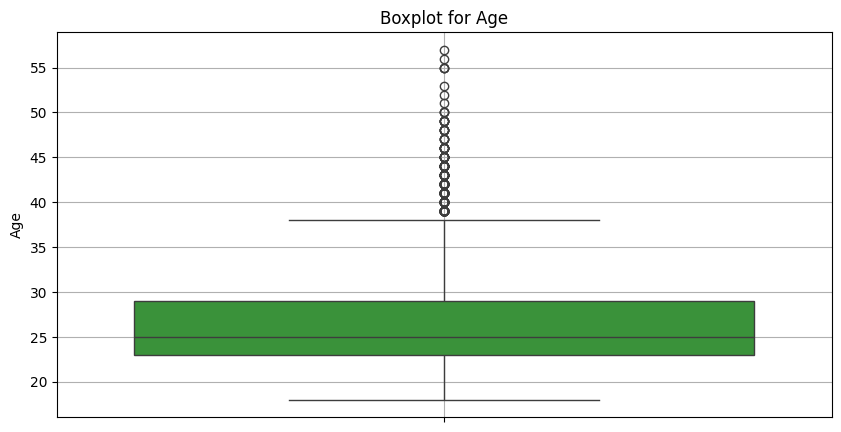

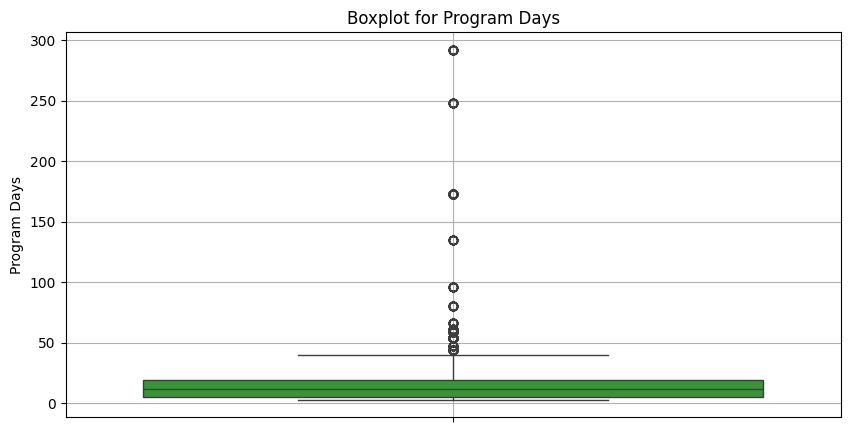

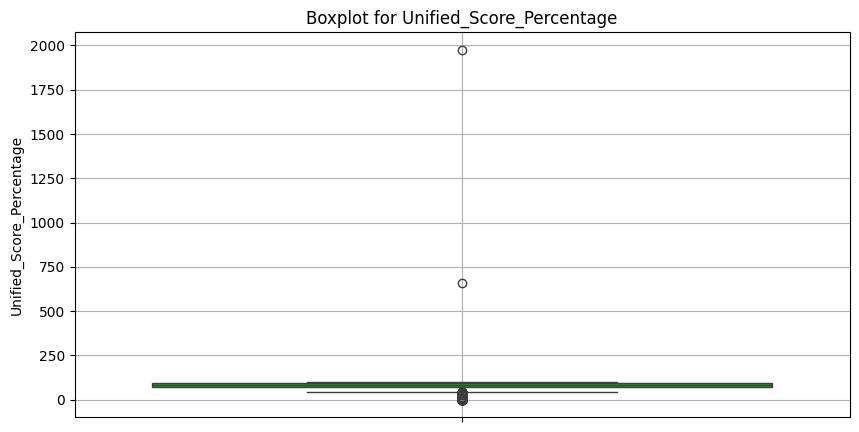

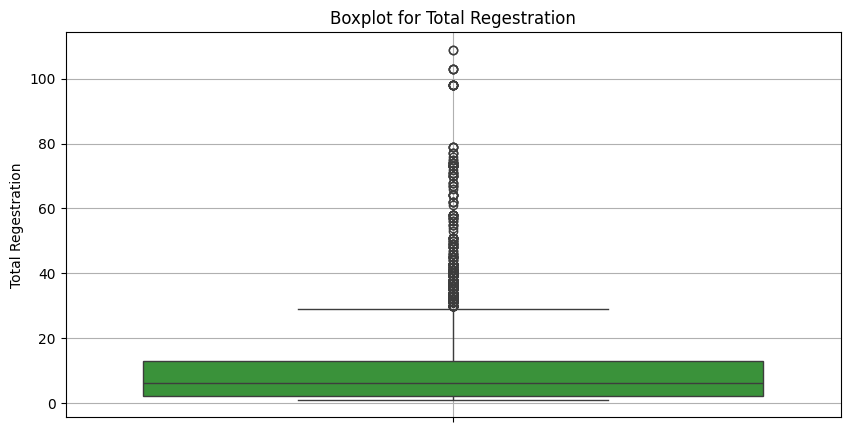


Column: Age
Lower bound: 14.00, Upper bound: 38.00
Number of outliers: 308
Outlier percentage: 4.74%

Column: Program Days
Lower bound: -16.00, Upper bound: 40.00
Number of outliers: 889
Outlier percentage: 13.68%

Column: Unified_Score_Percentage
Lower bound: 43.00, Upper bound: 121.40
Number of outliers: 181
Outlier percentage: 2.78%

Column: Total Regestration
Lower bound: -14.50, Upper bound: 29.50
Number of outliers: 396
Outlier percentage: 6.09%


In [ ]:
numeric_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns
outlier_mask = pd.Series([False] * len(merged_df))

for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(y=merged_df[col], color='#2ca02c')
    plt.title(f'Boxplot for {col}')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()


all_outliers = pd.DataFrame()
for col in numeric_cols:
    Q1 = merged_df[col].quantile(0.25)
    Q3 = merged_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = merged_df.copy()

    outliers = outliers[(outliers[col] < lower_bound) | (outliers[col] > upper_bound)]
    col_outliers = (merged_df[col] < lower_bound) | (merged_df[col] > upper_bound)
    outlier_mask = outlier_mask | col_outliers
    print(f"\nColumn: {col}")
    print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Outlier percentage: {len(outliers)/len(merged_df)*100:.2f}%")

    if not outliers.empty:
        outliers['Outlier_Column'] = col
        all_outliers = pd.concat([all_outliers, outliers])

##distribution

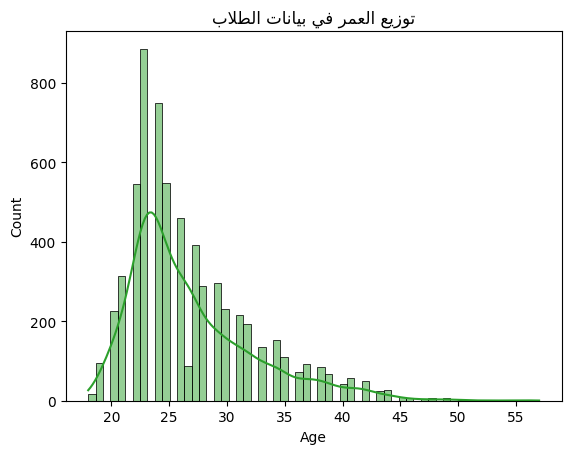

In [ ]:
sns.histplot(merged_df['Age'],kde=True , color='#2ca02c')
plt.title(reshape_revase_arabic(['توزيع العمر في بيانات الطلاب'])[0])
plt.show()

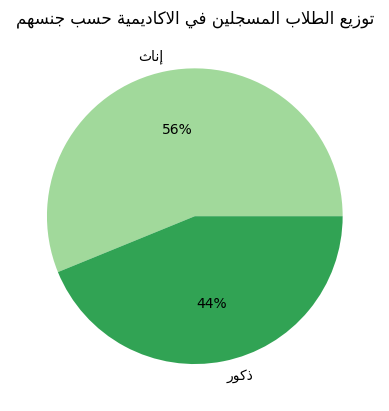

In [ ]:
genders = ['إناث','ذكور']
labels = reshape_revase_arabic(genders)


plt.pie(merged_df['Gender'].value_counts(), labels=labels, autopct='%1.0f%%', colors = ['#a1d99b', '#31a354'])
plt.title(reshape_revase_arabic(['توزيع الطلاب المسجلين في الاكاديمية حسب جنسهم'])[0])
plt.show()



<ipython-input-249-5b1b8341ae0d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(x = reshape_revase_arabic(region_ar.index), y = region_ar.values , palette=green_palette)


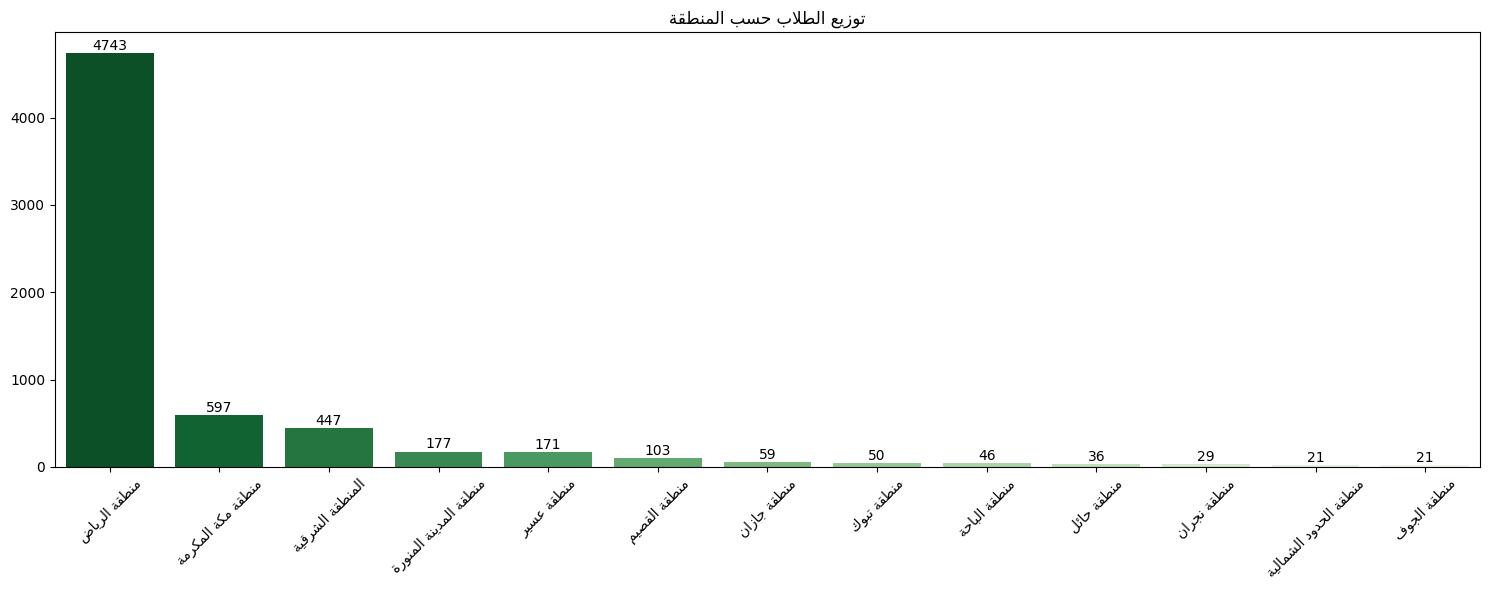

In [ ]:
region_ar = merged_df['Home Region'].value_counts()
plt.figure(figsize=(15, 6))
green_palette = sns.color_palette("Greens", n_colors=len(region_ar))[::-1]
ax= sns.barplot(x = reshape_revase_arabic(region_ar.index), y = region_ar.values , palette=green_palette)
for i, v in enumerate(region_ar.values):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)

plt.title(reshape_revase_arabic(['توزيع الطلاب حسب المنطقة'])[0])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





<ipython-input-250-1e0597860d05>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax =sns.barplot(x=program_counts.index,y=program_counts.values,palette=green_palette)


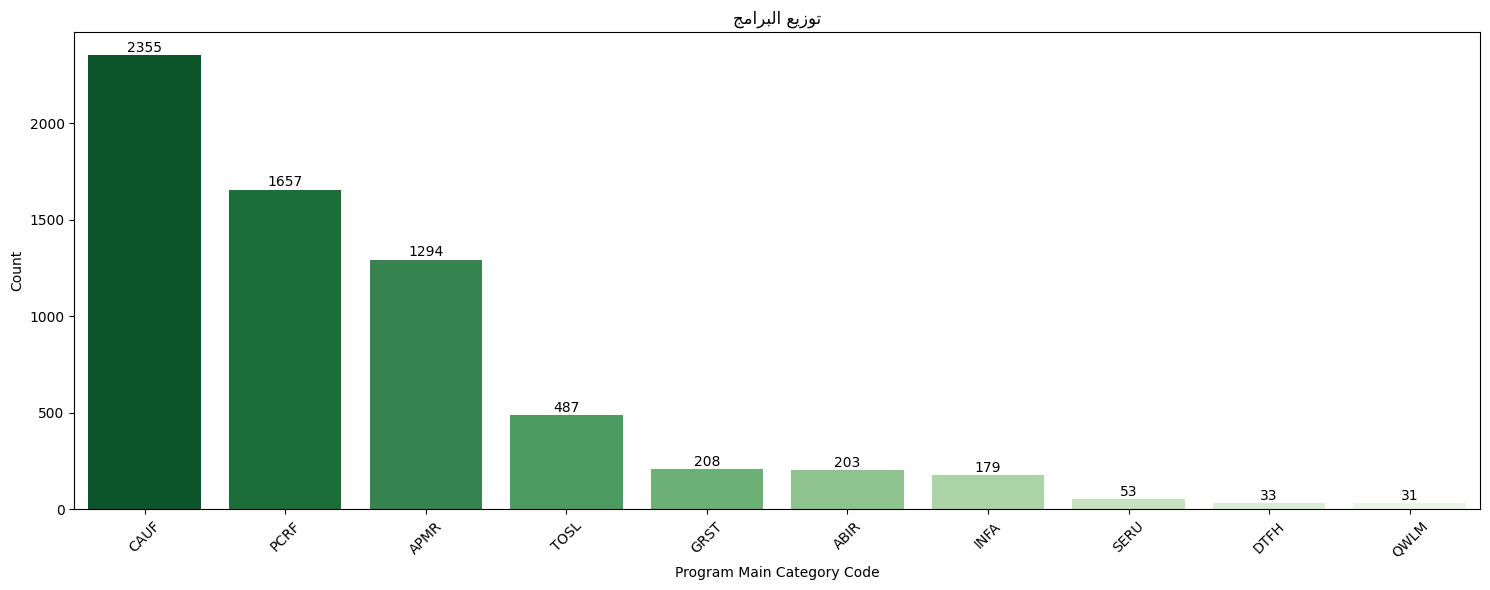

In [ ]:
program_counts = merged_df['Program Main Category Code'].value_counts()
plt.figure(figsize=(15, 6))
green_palette = sns.color_palette("Greens", n_colors=len(program_counts))[::-1]

ax =sns.barplot(x=program_counts.index,y=program_counts.values,palette=green_palette)
for i, v in enumerate(program_counts.values):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)

plt.title(reshape_revase_arabic(['توزيع البرامج'])[0])
plt.xlabel('Program Main Category Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


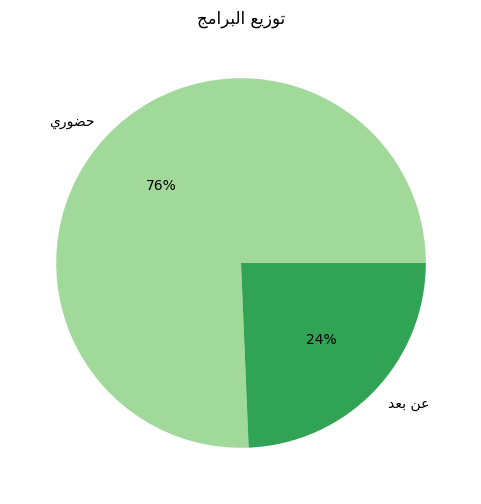

In [ ]:
method = merged_df['Program Presentation Method'].value_counts()
labels = reshape_revase_arabic(method.index)
plt.figure(figsize=(15, 6))
plt.pie(method,autopct='%1.0f%%',labels=labels , colors = ['#a1d99b', '#31a354'])
plt.title(reshape_revase_arabic(['توزيع البرامج'])[0])
plt.show()

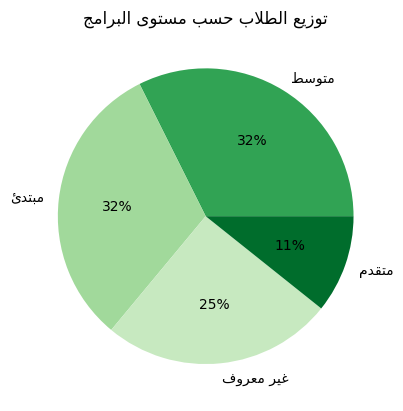

In [ ]:
program_skill = merged_df['Program Skill Level'].value_counts()
labels = reshape_revase_arabic(program_skill.index)
plt.pie(program_skill,labels=labels,autopct='%1.0f%%' , colors = ['#31a354', '#a1d99b', '#c7e9c0', '#006d2c'])
plt.title(reshape_revase_arabic(['توزيع الطلاب حسب مستوى البرامج'])[0])
plt.show()

<ipython-input-253-230dd55bc65a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = reshape_revase_arabic(education.index), y = education.values , palette = green_palette)
<ipython-input-253-230dd55bc65a>:2: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.barplot(x = reshape_revase_arabic(education.index), y = education.values , palette = green_palette)


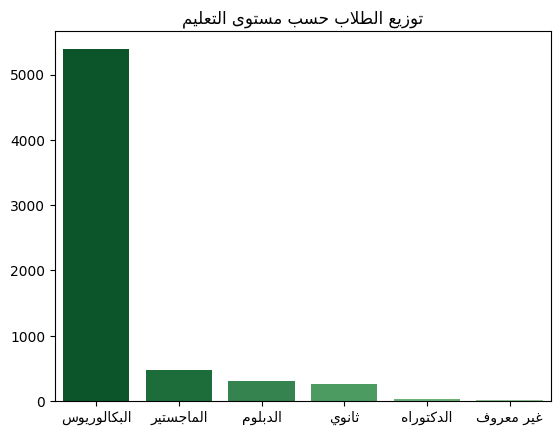

In [ ]:
education = merged_df['Level of Education'].value_counts()
sns.barplot(x = reshape_revase_arabic(education.index), y = education.values , palette = green_palette)
plt.title(reshape_revase_arabic(['توزيع الطلاب حسب مستوى التعليم'])[0])
plt.show()

<ipython-input-254-7a579b506900>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = reshape_revase_arabic(emp_status.index), y = emp_status.values , palette= green_palette)
<ipython-input-254-7a579b506900>:2: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.barplot(x = reshape_revase_arabic(emp_status.index), y = emp_status.values , palette= green_palette)


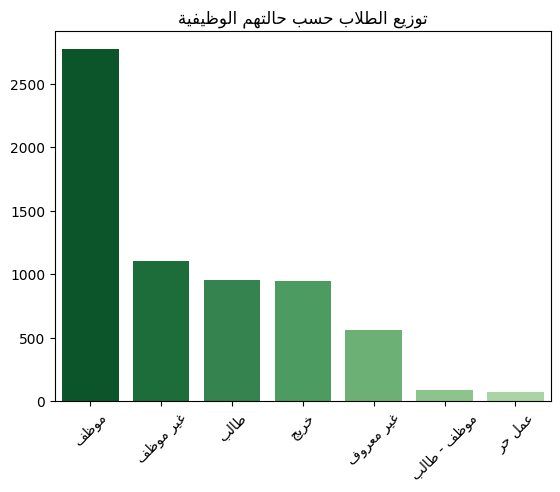

In [ ]:
emp_status = merged_df['Employment Status'].value_counts()
sns.barplot(x = reshape_revase_arabic(emp_status.index), y = emp_status.values , palette= green_palette)
plt.title(reshape_revase_arabic(['توزيع الطلاب حسب حالتهم الوظيفية'])[0])
plt.xticks(rotation=45)
plt.show()

In [ ]:
merged_df.columns

Index(['Student ID', 'Age', 'Gender', 'Home Region', 'Home City', 'Program ID',
       'Program Main Category Code', 'Program Sub Category Code',
       'Program Skill Level', 'Program Presentation Method',
       'Program Start Date', 'Program End Date', 'Program Days',
       'Completed Degree', 'Level of Education', 'Employment Status', 'Y',
       'Unified_Score_Percentage', 'College_Filled', 'Total Regestration'],
      dtype='object')

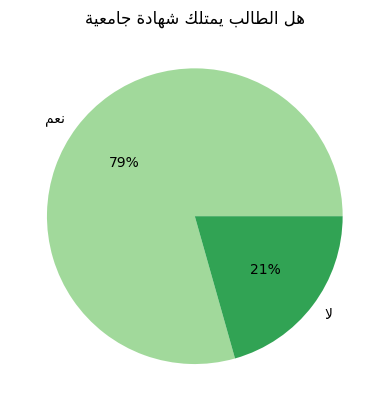

In [ ]:
degree = merged_df['Completed Degree'].value_counts()
labels = reshape_revase_arabic(degree.index)
plt.pie(degree,labels=labels,autopct='%1.0f%%' , colors = ['#a1d99b', '#31a354'])
plt.title(reshape_revase_arabic(['هل الطالب يمتلك شهادة جامعية'])[0])
plt.show()

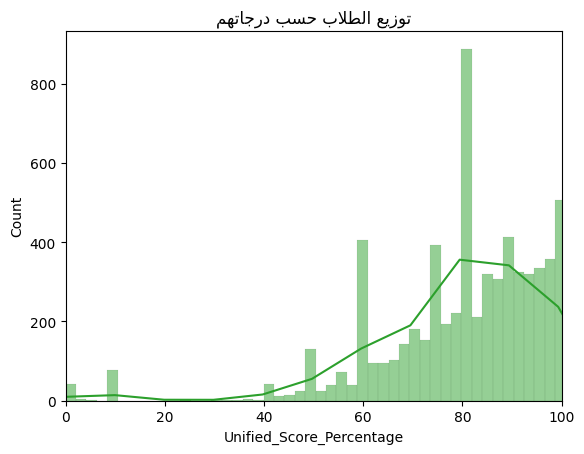

In [ ]:
sns.histplot(merged_df['Unified_Score_Percentage'],kde=True , color='#2ca02c')
plt.title(reshape_revase_arabic(['توزيع الطلاب حسب درجاتهم'])[0])
plt.xlim(0, 100)
plt.show()

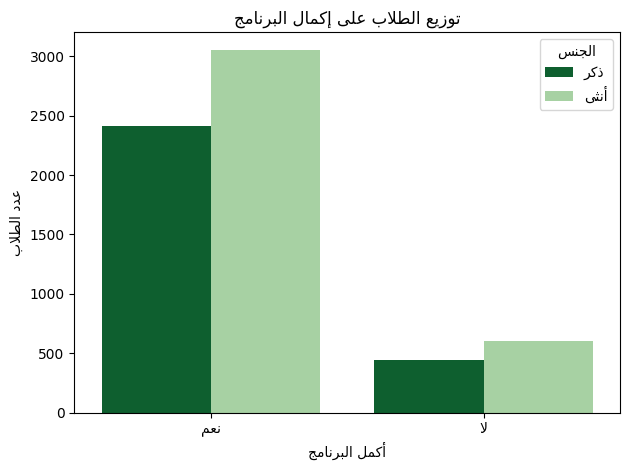

In [ ]:
gender_labels = merged_df['Gender'].unique().tolist()
reshaped_gender_labels = reshape_revase_arabic(gender_labels)

custom_colors = [ '#006d2c' , '#a1d99b']
sns.countplot(x='Y',hue='Gender',data=merged_df,hue_order=gender_labels,palette=custom_colors  )

plt.xticks([0, 1], reshape_revase_arabic(['نعم', 'لا']))
plt.title(reshape_revase_arabic(['توزيع الطلاب على إكمال البرنامج'])[0])
plt.xlabel(reshape_revase_arabic(['أكمل البرنامج'])[0])
plt.ylabel(reshape_revase_arabic(['عدد الطلاب'])[0])

handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles, reshaped_gender_labels, title=reshape_revase_arabic(['الجنس'])[0])
plt.tight_layout()
plt.show()


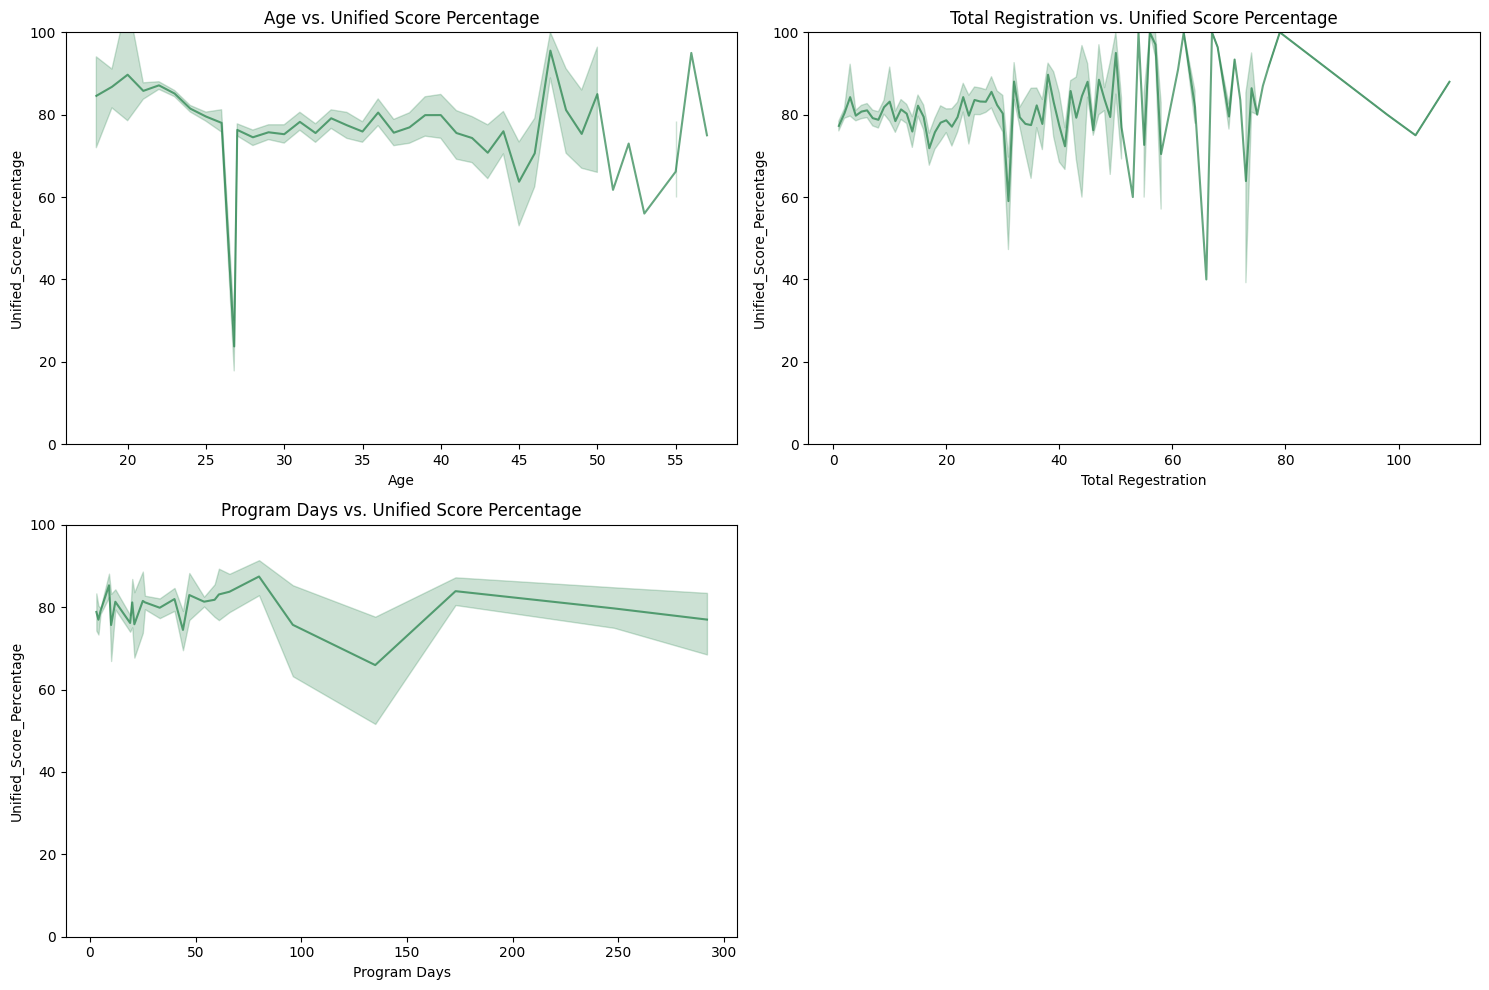

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.lineplot(x='Age', y='Unified_Score_Percentage', data=merged_df, alpha=0.6 , color='#006d2c')
plt.ylim(0, 100)
plt.title('Age vs. Unified Score Percentage')

plt.subplot(2, 2, 2)
sns.lineplot(x='Total Regestration', y='Unified_Score_Percentage', data=merged_df, alpha=0.6 , color='#006d2c')
plt.title('Total Registration vs. Unified Score Percentage')
plt.ylim(0, 100)

plt.subplot(2, 2, 3)
sns.lineplot(x='Program Days', y='Unified_Score_Percentage', data=merged_df, alpha=0.6 , color='#006d2c')
plt.title('Program Days vs. Unified Score Percentage')
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

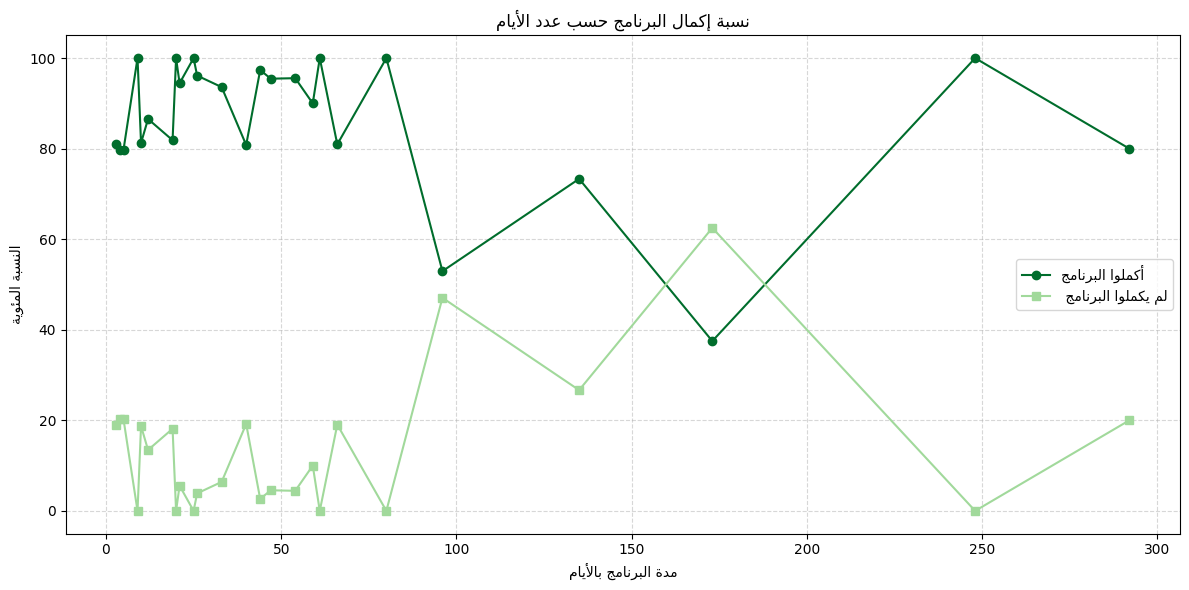

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

grouped = merged_df.groupby(['Program Days', 'Y']).size().unstack(fill_value=0)

percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100
percentage = percentage.reset_index()

colors = {0:'#006d2c' , 1: '#a1d99b'}

plt.figure(figsize=(12, 6))
plt.plot(percentage['Program Days'], percentage[0], label=reshape_revase_arabic(['أكملوا البرنامج'])[0], color=colors[0], marker='o')
plt.plot(percentage['Program Days'], percentage[1], label=reshape_revase_arabic(['لم يكملوا البرنامج '])[0], color=colors[1], marker='s')

plt.title(reshape_revase_arabic(['نسبة إكمال البرنامج حسب عدد الأيام'])[0])
plt.xlabel(reshape_revase_arabic(['مدة البرنامج بالأيام'])[0])
plt.ylabel(reshape_revase_arabic(['النسبة المئوية'])[0])
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


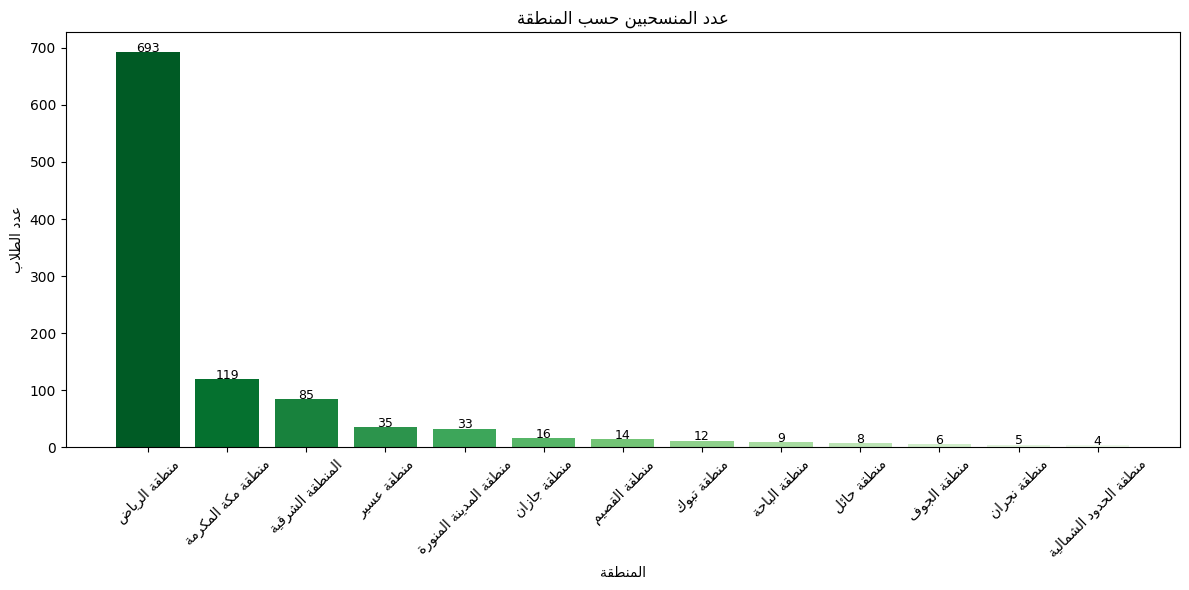

In [ ]:
contingency_table = pd.crosstab(merged_df['Home Region'], merged_df['Y'])
contingency_count_1 = contingency_table[[1]].sort_values(by=1, ascending=False)

regions_sorted = contingency_count_1.index.tolist()
values = contingency_count_1[1].tolist()
labels = reshape_revase_arabic(regions_sorted)

green_palette = sns.color_palette("Greens", n_colors=len(values))[::-1]

plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(values)), values, color=green_palette)

plt.title(reshape_revase_arabic(['عدد المنسحبين حسب المنطقة'])[0])
plt.xlabel(reshape_revase_arabic(['المنطقة'])[0])
plt.ylabel(reshape_revase_arabic(['عدد الطلاب'])[0])
plt.xticks(range(len(labels)), labels, rotation=45)

for i, value in enumerate(values):
    plt.text(i, value + 0.5, str(value), ha='center', fontsize=9)

plt.tight_layout()
plt.show()



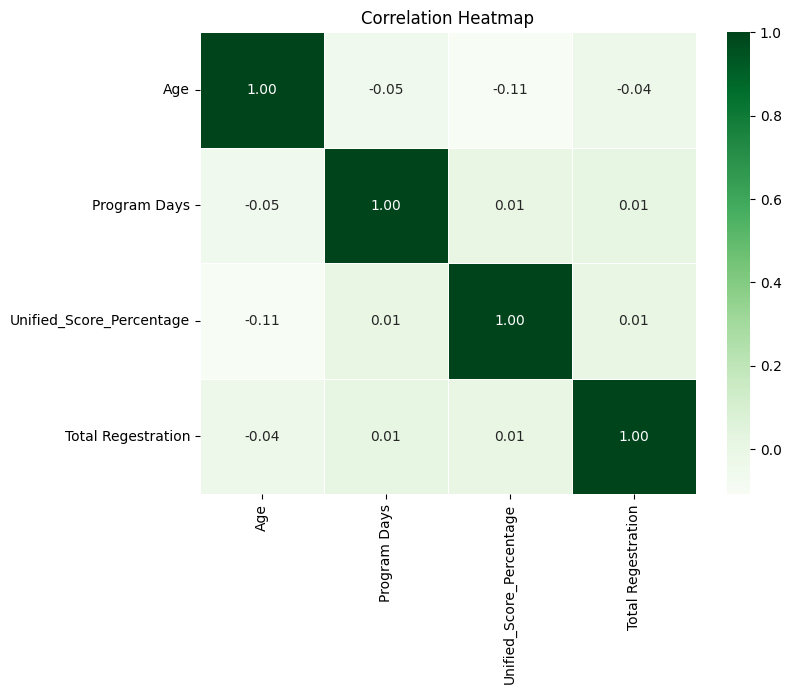

In [ ]:
corr = merged_df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='Greens', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

# feature selection and engineering

In [ ]:
merged_df.columns

Index(['Student ID', 'Age', 'Gender', 'Home Region', 'Home City', 'Program ID',
       'Program Main Category Code', 'Program Sub Category Code',
       'Program Skill Level', 'Program Presentation Method',
       'Program Start Date', 'Program End Date', 'Program Days',
       'Completed Degree', 'Level of Education', 'Employment Status', 'Y',
       'Unified_Score_Percentage', 'College_Filled', 'Total Regestration'],
      dtype='object')

In [ ]:
ml_df = merged_df.drop(columns=[
    'Program Start Date', 'Program End Date',
    'Technology Type', 'Education Speaciality', 'University Degree Score System',
    'Job Type', 'Still Working', 'College', 'University Degree Score'
], errors='ignore')

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
# Label encode categorical columns
for col in ml_df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    ml_df[col] = le.fit_transform(ml_df[col])
for col in df_test_edited.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_test_edited[col] = le.fit_transform(df_test_edited[col])

df_test_edited.to_csv('df_afterCleanning_Testing.csv', index=False)

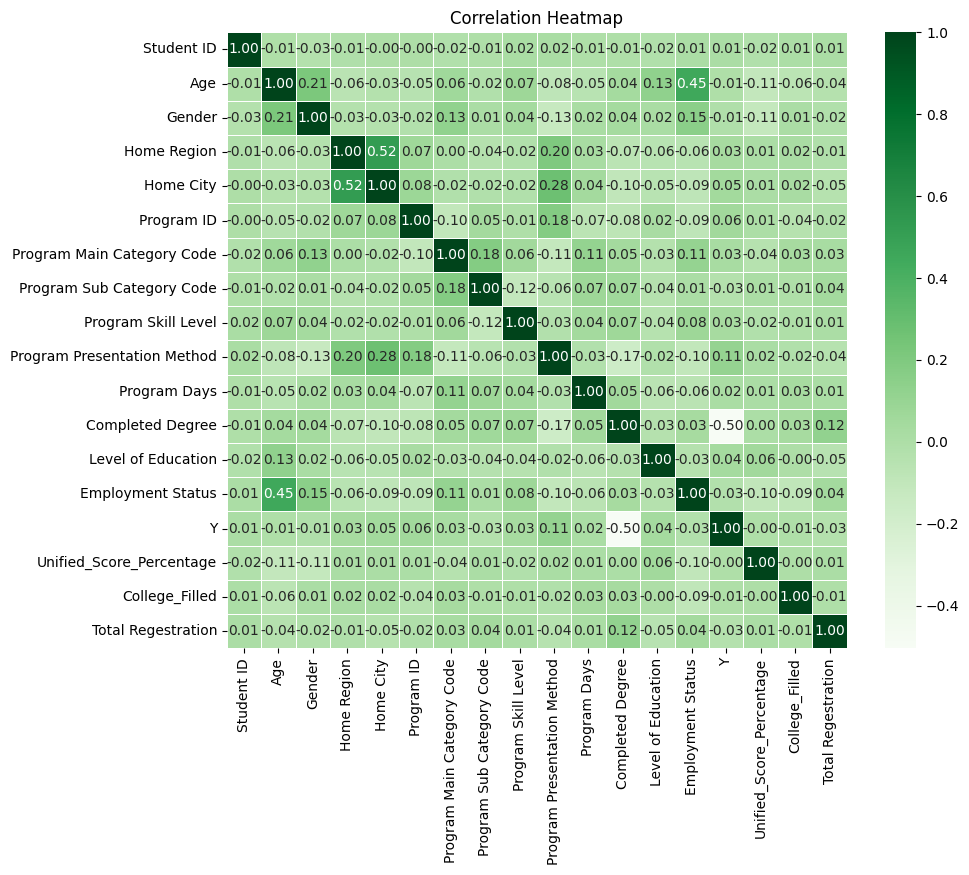

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(ml_df.corr(), annot=True, cmap='Greens', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

# ML model creation

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Prepare features and target
X = ml_df.drop(columns='Y')
y = ml_df['Y']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.15)

# Define XGBoost model with tuned parameters
xgb = XGBClassifier(
    n_estimators=500,
    max_depth=3,
    learning_rate=0.05,
    subsample=0.7,
    colsample_bytree=0.6,
    min_child_weight=5,
    gamma=0,
    eval_metric='logloss',
    random_state=42
)

# Define base models for stacking
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Stacking ensemble
stack = StackingClassifier(
    estimators=[
        ('xgb', xgb),
        ('logreg', logreg),
        ('rf', rf)
    ]
)

# Pipeline with SMOTE + scaler + stacking
pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('clf', stack)
])

# Fit pipeline
pipeline.fit(X_train, y_train)

# Predict probabilities for threshold tuning
y_probs = pipeline.predict_proba(X_test)[:, 1]

# Threshold tuning to maximize F1 score
thresholds = np.arange(0.3, 0.71, 0.01)
f1_scores = [f1_score(y_test, y_probs > t) for t in thresholds]

best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Best threshold: {best_threshold:.2f} with F1 score: {max(f1_scores):.4f}")

# Final predictions with tuned threshold
y_pred = (y_probs > best_threshold).astype(int)

# Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

Best threshold: 0.38 with F1 score: 0.6926
Accuracy: 0.90
F1 Score: 0.69
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       819
           1       0.70      0.69      0.69       156

    accuracy                           0.90       975
   macro avg       0.82      0.81      0.82       975
weighted avg       0.90      0.90      0.90       975



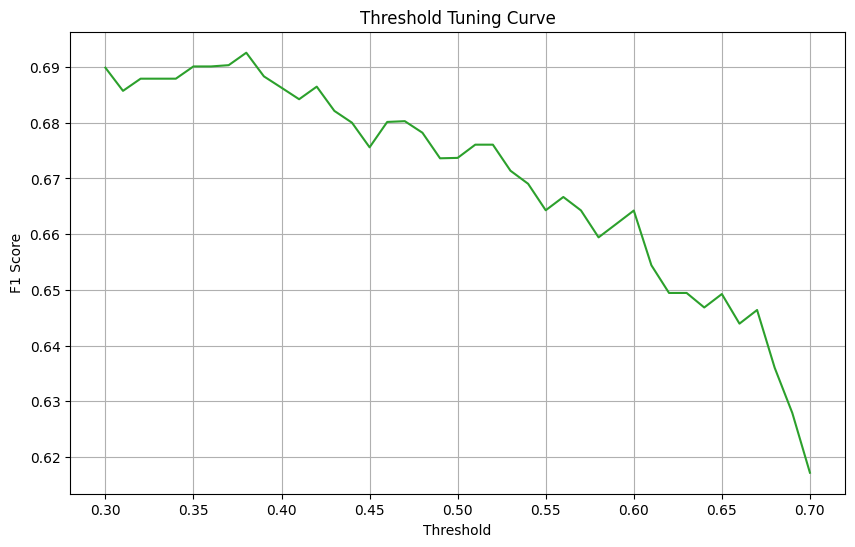

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores ,color='#2ca02c')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('Threshold Tuning Curve')
plt.grid(True)
plt.show()

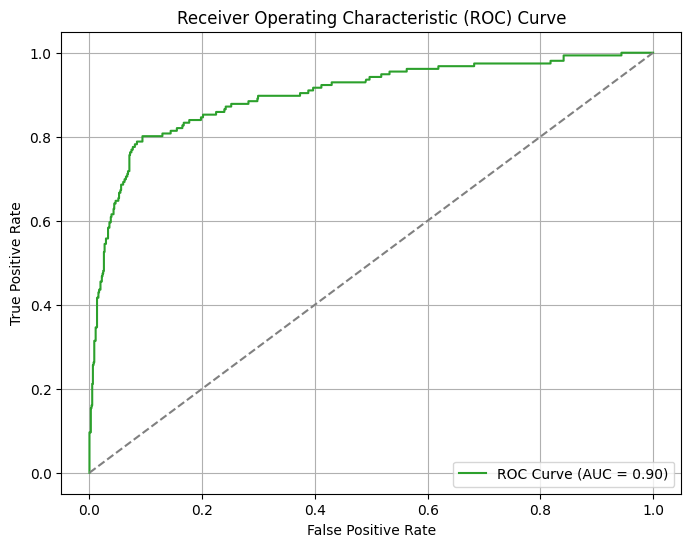

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='#2ca02c')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# testing the model

In [ ]:
import joblib

# Save the entire pipeline (includes SMOTE, Scaler, Model)
joblib.dump(pipeline, 'final_model_pipeline.pkl')

['final_model_pipeline.pkl']

In [ ]:
# Load the saved model
loaded_pipeline = joblib.load('final_model_pipeline.pkl')

df_test = pd.read_csv('/content/df_afterCleanning_Testing.csv')

In [ ]:
y_probs = loaded_pipeline.predict_proba(df_test)[:, 1]
y_pred = (y_probs > 0.39).astype(int)

In [ ]:
submission = pd.DataFrame({
    'ID': range(1, len(df_test) + 1),
    'Predicted': y_pred
})

submission.to_csv('final_predictions.csv', index=False)